In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

importing the necessary libraries

In [52]:
loan = pd.read_csv('C:/Users/lenovo/Downloads/loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


here the dataseet contain the data of the bank cutomer .It is the classification problem

In [53]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [55]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
loan.dropna(axis=0,inplace=True)

In [57]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [58]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


<Axes: ylabel='ApplicantIncome'>

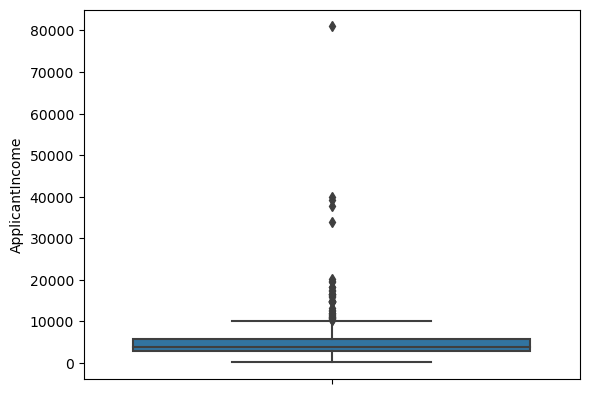

In [60]:
sns.boxplot(y='ApplicantIncome',data=loan)

<Axes: ylabel='CoapplicantIncome'>

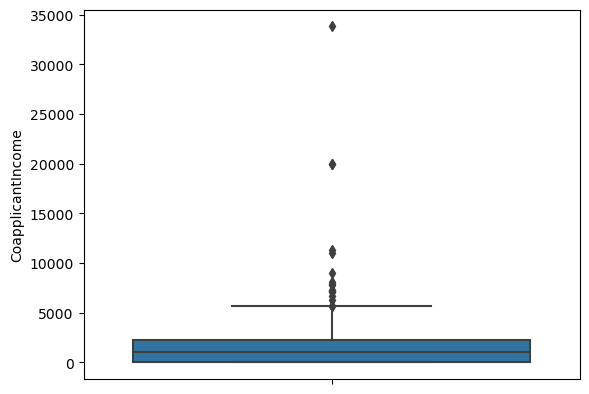

In [61]:
sns.boxplot(y="CoapplicantIncome",data=loan)

In [62]:
loan.skew()

ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
dtype: float64

<Axes: ylabel='LoanAmount'>

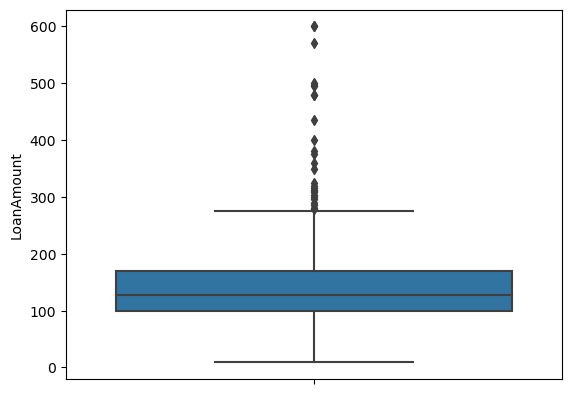

In [63]:
sns.boxplot(y="LoanAmount",data=loan)

In [64]:
cor = loan.corr()
cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<Axes: >

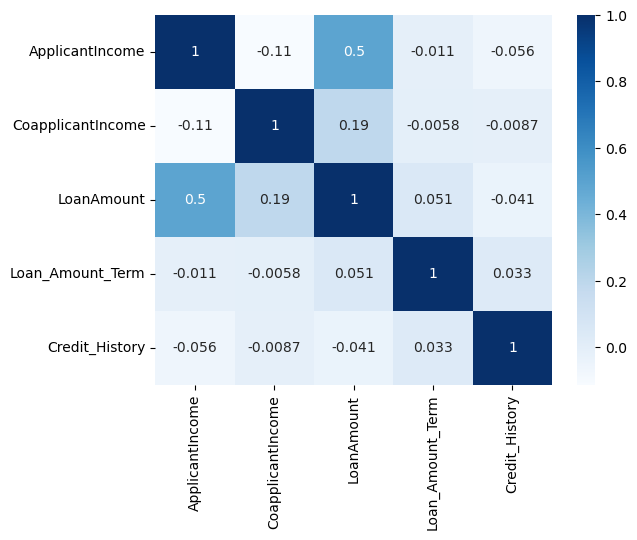

In [65]:
sns.heatmap(cor,cmap="Blues",annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

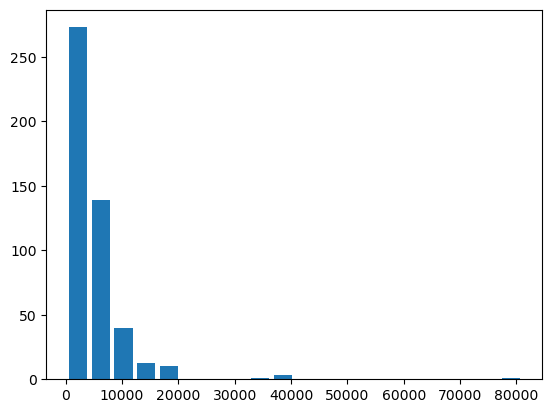

In [66]:
plt.hist(loan.ApplicantIncome, bins=20, rwidth=0.8)
plt.xlabel=("Applicantincome")
plt.ylable=("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

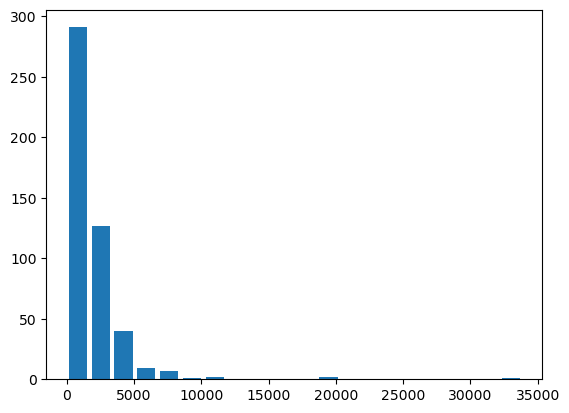

In [67]:
plt.hist(loan.CoapplicantIncome, bins=20, rwidth=0.8)
plt.xlabel=("CoapplicantIncome")
plt.ylable=("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

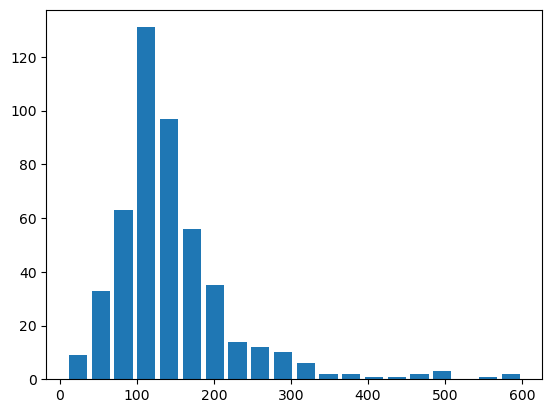

In [68]:
plt.hist(loan.LoanAmount, bins=20, rwidth=0.8)
plt.xlabel=("LoanAmount")
plt.ylable=("Count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

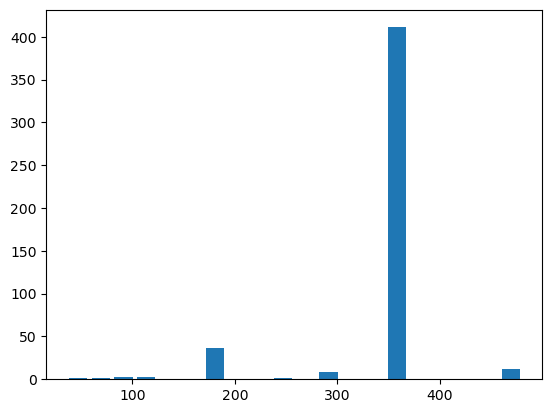

In [69]:
plt.hist(loan.Loan_Amount_Term, bins=20, rwidth=0.8)
plt.xlabel=("Loan_Amount_Term")
plt.ylable=("Count")
plt.show

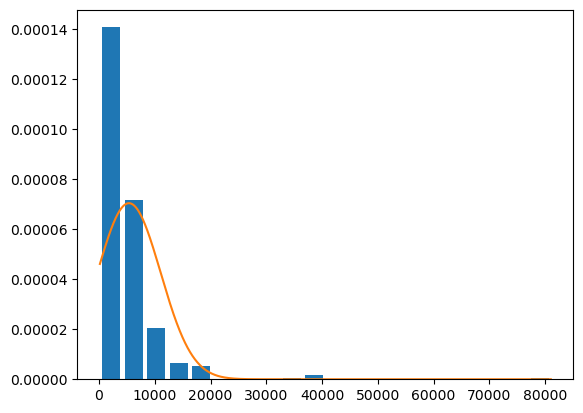

In [70]:
from scipy.stats import norm
plt.hist(loan.ApplicantIncome, bins=20, rwidth=0.8,density=True)
plt.xlabel=("Applicantincome")
plt.ylable=("Count")
plt.show

rng=np.arange(loan.ApplicantIncome.min(),loan.ApplicantIncome.max(),0.1)
plt.plot(rng,norm.pdf(rng,loan.ApplicantIncome.mean(),loan.ApplicantIncome.std()))

In [71]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [72]:
loan['zscore_ApplicantIncome']= (loan.ApplicantIncome-loan.ApplicantIncome.mean())/loan.ApplicantIncome.std()

loan['zscore_CoapplicantIncome'] = (loan.CoapplicantIncome-loan.CoapplicantIncome.mean())/loan.CoapplicantIncome.std()

loan['zscore_LoanAmount']=(loan.LoanAmount-loan.LoanAmount.mean())/loan.LoanAmount.std()

In [73]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973


In [74]:
loan_1= loan[(loan.zscore_ApplicantIncome>-3)&(loan.zscore_ApplicantIncome<3)]
loan_1= loan[(loan.zscore_CoapplicantIncome>-3)&(loan.zscore_CoapplicantIncome<3)]
loan_1= loan[(loan.zscore_LoanAmount>-3)&(loan.zscore_LoanAmount<3)]
loan_1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973


In [75]:
loan_1.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,-0.327126,-0.604003,-0.853770
478,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y,1.994049,0.255533,-0.729559
257,LP001854,Male,Yes,3+,Graduate,No,5250,0.0,94.0,360.0,1.0,Urban,N,-0.020153,-0.604003,-0.630190
60,LP001205,Male,Yes,0,Graduate,No,2500,3796.0,120.0,360.0,1.0,Urban,Y,-0.505311,0.846129,-0.307241
46,LP001138,Male,Yes,1,Graduate,No,5649,0.0,44.0,360.0,1.0,Urban,Y,0.050239,-0.604003,-1.251245


In [76]:
d=pd.get_dummies(loan_1.Gender)
d

,Female,Male
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


here dummy character is given to replace the string values 

In [77]:
loan_2=pd.concat([loan_1,d.drop('Female',axis='columns')],axis='columns')
loan_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1


In [78]:
m=pd.get_dummies(loan_2.Married)
m

,No,Yes
1,0,1
2,0,1
3,0,1
4,1,0
5,0,1
...,...,...
609,1,0
610,0,1
611,0,1
612,0,1


In [79]:
loan_3=pd.concat([loan_2,m.drop('No',axis='columns')],axis='columns')
loan_3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1,0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1,1


Here column Yes in above dataset is for replacement for Married column 

In [80]:
e=pd.get_dummies(loan_3.Education)
e

,Graduate,Not Graduate
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [81]:
loan_4=pd.concat([loan_3,e.drop('Not Graduate',axis='columns')],axis='columns')
loan_4

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1,0,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1,1,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1,1,1


In [82]:
s=pd.get_dummies(loan_4.Self_Employed)
s

,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,0,1
...,...,...
609,1,0
610,1,0
611,1,0
612,1,0


In [83]:
loan_5=pd.concat([loan_4,s.drop('Yes',axis='columns')],axis='columns')
loan_5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1,1,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1,1,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1,1,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1,0,1,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0,0,1,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1,1,1,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1,1,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1,1,1,1


Here column No in the above dataset is the replacement for Self_Employed

In [84]:
p=pd.get_dummies(loan_5.Property_Area)
p

,Rural,Semiurban,Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [85]:
loan_6=pd.concat([loan_5,p],axis='columns')
loan_6

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,...,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,...,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,...,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,...,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,...,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [86]:
loan_7=loan_6.drop('Gender',axis=1)
loan_7

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,...,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,...,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,...,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,...,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [87]:
loan_8=loan_7.drop('Married',axis=1)
loan_8

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,...,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,...,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,...,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,...,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,...,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,...,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,...,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,...,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,...,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,...,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [88]:
loan_9=loan_8.drop('Education',axis=1)
loan_9

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,2,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [89]:
loan_10=loan_9.drop('Self_Employed',axis=1)
loan_10

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Urban,Y,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Urban,Y,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [90]:
loan_11=loan_10.drop('Property_Area',axis=1)
loan_11

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,zscore_ApplicantIncome,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,-0.137826,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,-0.417101,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,-0.490668,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,0.112163,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0.009310,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,-0.434743,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,-0.221979,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,0.477708,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0.391438,-0.604003,0.524973,1,1,1,1,0,0,1


In [91]:
loan_12=loan_11.drop('zscore_ApplicantIncome',axis=1)
loan_12

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,zscore_CoapplicantIncome,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,-0.027923,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,-0.604003,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,0.296791,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,-0.604003,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,0.998936,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,-0.604003,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,-0.604003,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,-0.512319,1.344765,1,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,-0.604003,0.524973,1,1,1,1,0,0,1


In [92]:
loan_13=loan_12.drop('zscore_CoapplicantIncome',axis=1)
loan_13

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,zscore_LoanAmount,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,-0.207872,1,1,1,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,-0.977981,1,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,-0.307241,1,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,-0.046398,1,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,1.518661,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,-0.915875,0,0,1,1,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,-1.300929,1,1,1,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,1.344765,1,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,0.524973,1,1,1,1,0,0,1


In [93]:
loan_14=loan_13.drop('zscore_LoanAmount',axis=1)
loan_14

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,1,1,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,1,0,0,1
5,LP001011,2,5417,4196.0,267.0,360.0,1.0,Y,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71.0,360.0,1.0,Y,0,0,1,1,1,0,0
610,LP002979,3+,4106,0.0,40.0,180.0,1.0,Y,1,1,1,1,1,0,0
611,LP002983,1,8072,240.0,253.0,360.0,1.0,Y,1,1,1,1,0,0,1
612,LP002984,2,7583,0.0,187.0,360.0,1.0,Y,1,1,1,1,0,0,1


In [94]:
loan_15=loan_14.drop('Loan_ID',axis=1)
loan_15

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Graduate,No,Rural,Semiurban,Urban
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,1,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,1,0,0,1
5,2,5417,4196.0,267.0,360.0,1.0,Y,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y,0,0,1,1,1,0,0
610,3+,4106,0.0,40.0,180.0,1.0,Y,1,1,1,1,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,Y,1,1,1,1,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,Y,1,1,1,1,0,0,1


In [95]:
D=pd.get_dummies(loan_6.Dependents)
D

,0,1,2,3+
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,0,1,0
...,...,...,...,...
609,1,0,0,0
610,0,0,0,1
611,0,1,0,0
612,0,0,1,0


In [96]:
loan_16=pd.concat([loan_15,D],axis='columns')
loan_16

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Graduate,No,Rural,Semiurban,Urban,0,1,2,3+
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,1,1,0,0,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1,1,0,0,0
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,0,1,1,0,0,0
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,1,1,0,0,1,1,0,0,0
5,2,5417,4196.0,267.0,360.0,1.0,Y,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,Y,0,0,1,1,1,0,0,1,0,0,0
610,3+,4106,0.0,40.0,180.0,1.0,Y,1,1,1,1,1,0,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,Y,1,1,1,1,0,0,1,0,1,0,0
612,2,7583,0.0,187.0,360.0,1.0,Y,1,1,1,1,0,0,1,0,0,1,0


In [97]:
loan_17=loan_16.drop('Dependents',axis=1)
loan_17

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Graduate,No,Rural,Semiurban,Urban,0,1,2,3+
1,4583,1508.0,128.0,360.0,1.0,N,1,1,1,1,1,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,Y,1,0,1,1,0,0,1,1,0,0,0
5,5417,4196.0,267.0,360.0,1.0,Y,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,Y,0,0,1,1,1,0,0,1,0,0,0
610,4106,0.0,40.0,180.0,1.0,Y,1,1,1,1,1,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,Y,1,1,1,1,0,0,1,0,1,0,0
612,7583,0.0,187.0,360.0,1.0,Y,1,1,1,1,0,0,1,0,0,1,0


In [99]:
x=loan_17.drop('Loan_Status',axis=1)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Graduate,No,Rural,Semiurban,Urban,0,1,2,3+
1,4583,1508.0,128.0,360.0,1.0,1,1,1,1,1,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,0,1,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,0,1,1,0,0,0
5,5417,4196.0,267.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,0,0,1,1,1,0,0,1,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,1,1,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,1,0,1,0,0
612,7583,0.0,187.0,360.0,1.0,1,1,1,1,0,0,1,0,0,1,0


In [101]:
y=loan_17.Loan_Status
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 470, dtype: object

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

Here for model training dataset is split into 80/20 percentage that`swhy 0.2 is given 

In [155]:
x_train.shape

(376, 16)

In [156]:
y_train.shape

(376,)

In [157]:
x_test.shape

(94, 16)

In [158]:
y_test.shape

(94,)

In [159]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [160]:
predict=gnb.predict(x_test)

In [161]:
predict

array(['Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y'], dtype='<U1')

In [162]:
print(accuracy_score(y_test,predict))

0.8191489361702128


In [163]:
print(confusion_matrix(y_test,predict))

[[19 12]
 [ 5 58]]


In [164]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           N       0.79      0.61      0.69        31
           Y       0.83      0.92      0.87        63

    accuracy                           0.82        94
   macro avg       0.81      0.77      0.78        94
weighted avg       0.82      0.82      0.81        94



In [170]:
def predictgnbf(d):
    d=d.reshape(1,-1)
    pred=gnb.predict(d)
    print("Loan Status=",pred)

In [172]:
d=np.array([3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,0])
predictgnbf(d)

Loan Status= ['Y']


Here my model is perfoming well

In [165]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [166]:
pred=clf.predict(x_test)
pred

array(['Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y'], dtype=object)

In [167]:
print(accuracy_score(y_test,pred))

0.7553191489361702


In [168]:
print(confusion_matrix(y_test,pred))

[[21 10]
 [13 50]]


In [169]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.62      0.68      0.65        31
           Y       0.83      0.79      0.81        63

    accuracy                           0.76        94
   macro avg       0.73      0.74      0.73        94
weighted avg       0.76      0.76      0.76        94



From above Model Selection best Model for Loan Application Status Prediction is GaussianNB because it is given best results 